<a href="https://colab.research.google.com/github/FrancoFM93/challenge_1_DS/blob/main/challenge_1_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clonar el repositorio y cargar archivos

In [45]:
!git clone https://github.com/alura-es-cursos/challenge1-data-science-latam.git
%cd challenge1-data-science-latam

Cloning into 'challenge1-data-science-latam'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 3), reused 3 (delta 3), pack-reused 2 (from 1)
Receiving objects: 100% (10/10), 171.26 KiB | 3.11 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/challenge1-data-science-latam/challenge1-data-science-latam/challenge1-data-science-latam/challenge1-data-science-latam/challenge1-data-science-latam/challenge1-data-science-latam


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style="whitegrid")

##Cargar y preparar los datos

In [48]:
# Rutas a los archivos
archivos = {
    "Tienda 1": "/content/challenge1-data-science-latam/base-de-datos-challenge1-latam/tienda_1 .csv",
    "Tienda 2": "/content/challenge1-data-science-latam/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "/content/challenge1-data-science-latam/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "/content/challenge1-data-science-latam/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Crear DataFrame unificado
df_list = []
for tienda, archivo in archivos.items():
    df = pd.read_csv(archivo)
    df['Tienda'] = tienda
    df_list.append(df)

df_total = pd.concat(df_list, ignore_index=True)

# Verificar los datos
df_total.head()
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


##Ajustar nombres de columnas

In [49]:
df_total.columns = df_total.columns.str.strip().str.replace(' ', '_')
df_total.head(2)

,Producto,Categoría_del_Producto,Precio,Costo_de_envío,Fecha_de_Compra,Vendedor,Lugar_de_Compra,Calificación,Método_de_pago,Cantidad_de_cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1


##Calcular ingresos totales por tienda

     Tienda Ingreso_Total_str
0  Tienda 1    $1,150,880,400
1  Tienda 2    $1,116,343,500
2  Tienda 3    $1,098,019,600
3  Tienda 4    $1,038,375,700


/tmp/ipython-input-3773449858.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Ingreso_Total', data=ingresos, palette="Blues_d")


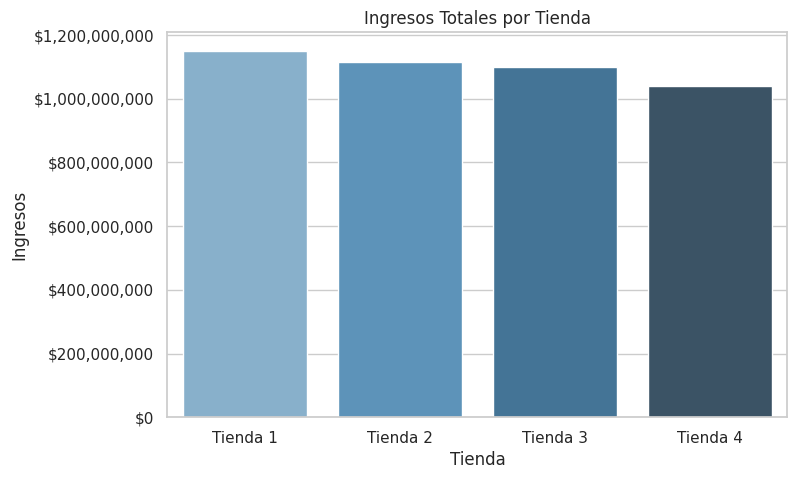

In [50]:
# Calcular ingreso total por tienda sumando la columna Precio
ingresos = df_total.groupby('Tienda')['Precio'].sum().reset_index()
ingresos.rename(columns={'Precio':'Ingreso_Total'}, inplace=True)

# Mostrar tabla con separadores de miles
ingresos['Ingreso_Total_str'] = ingresos['Ingreso_Total'].apply(lambda x: f"${x:,.0f}")
print(ingresos[['Tienda','Ingreso_Total_str']])

# Gráfico de barras de ingresos
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Tienda', y='Ingreso_Total', data=ingresos, palette="Blues_d")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos")
plt.xlabel("Tienda")
plt.show()

##Categorías más vendidas por tienda




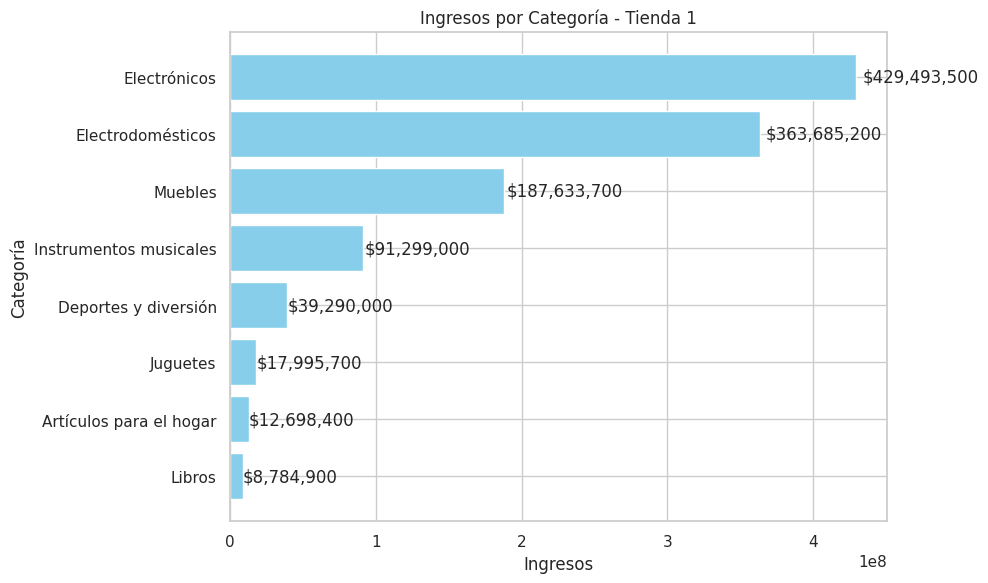

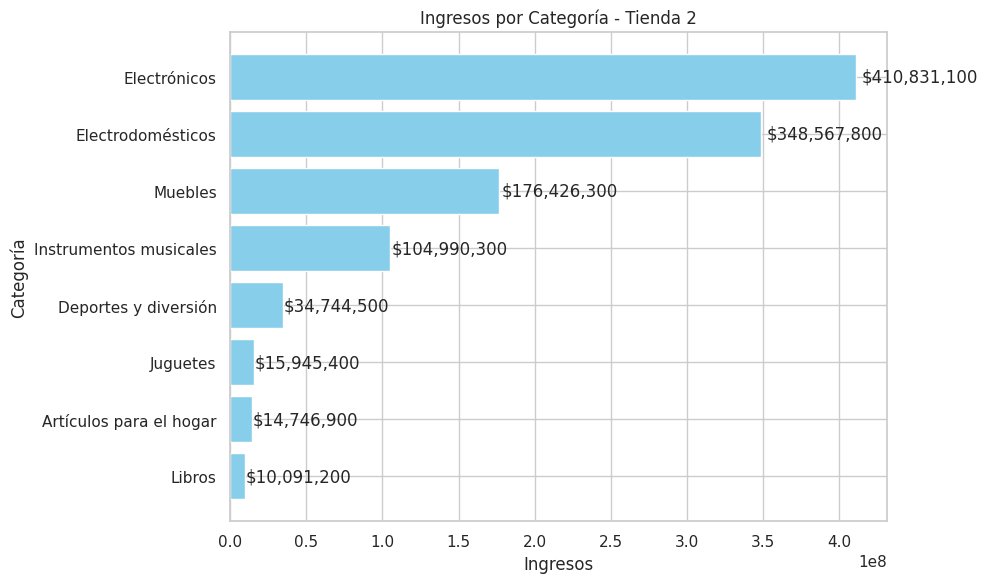

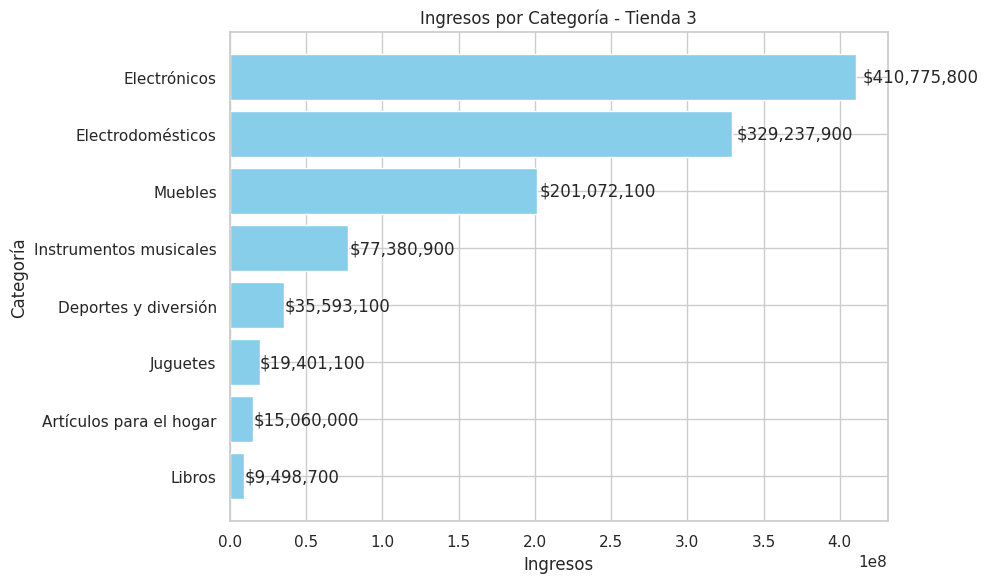

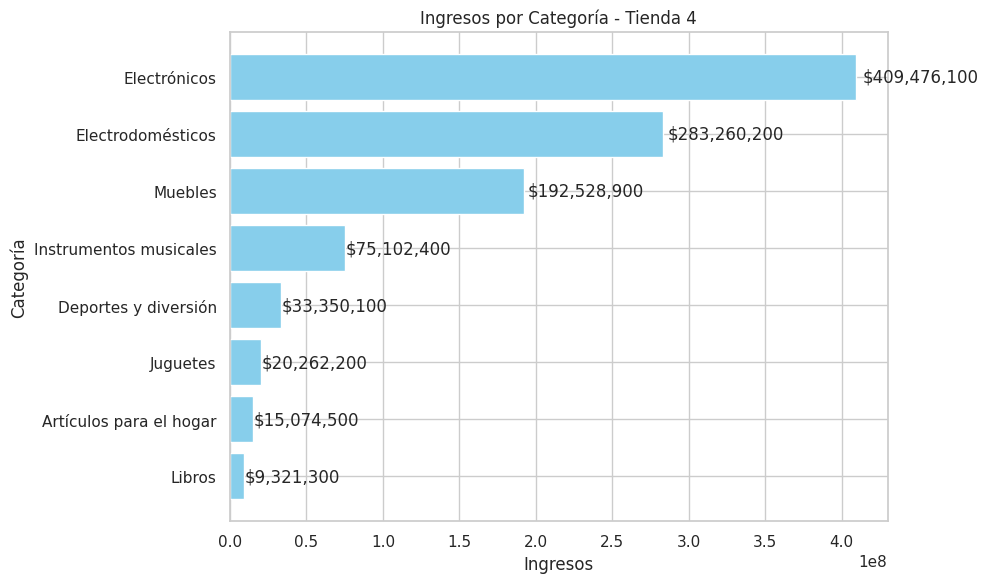

In [57]:
for tienda in df_total['Tienda'].unique():
    datos = categorias[categorias['Tienda'] == tienda].sort_values(by='Ingreso_Categoria', ascending=True)
    plt.figure(figsize=(10,6))
    bars = plt.barh(datos['Categoría_del_Producto'], datos['Ingreso_Categoria'], color='skyblue')

    plt.title(f"Ingresos por Categoría - {tienda}")
    plt.xlabel("Ingresos")
    plt.ylabel("Categoría")

    # Agregar números encima de cada barra
    for bar in bars:
        width = bar.get_width()
        plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", va='center')

    plt.tight_layout()
    plt.show()

##Valoración media por tienda

     Tienda  Calificación_Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


/tmp/ipython-input-827932740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificación_Promedio', data=reseñas, palette="Greens_d")


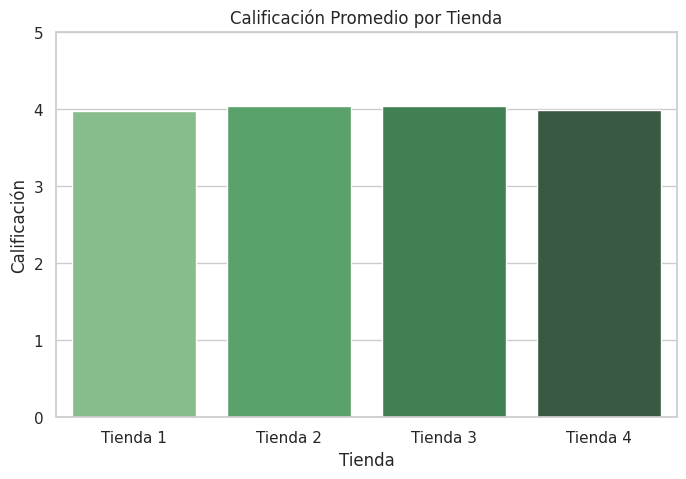

In [60]:
# Calificación promedio por tienda
reseñas = df_total.groupby('Tienda')['Calificación'].mean().reset_index()
reseñas.rename(columns={'Calificación':'Calificación_Promedio'}, inplace=True)
print(reseñas)

plt.figure(figsize=(8,5))
sns.barplot(x='Tienda', y='Calificación_Promedio', data=reseñas, palette="Greens_d")
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación")
plt.xlabel("Tienda")
plt.ylim(0,5)  # Calificación de 1 a 5
plt.show()

##Productos más vendidos (Top 5 por tienda)

/tmp/ipython-input-521122610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad_Vendida', y='Producto', data=top_productos, palette="Oranges_d")


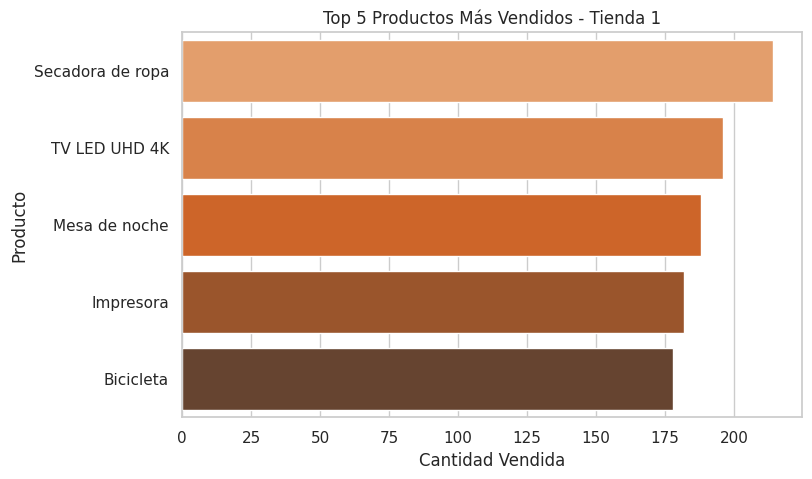

/tmp/ipython-input-521122610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad_Vendida', y='Producto', data=top_productos, palette="Oranges_d")


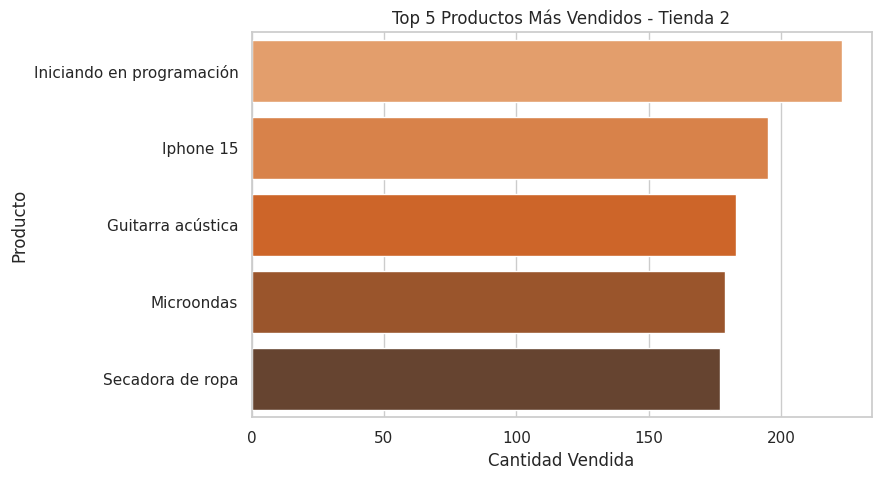

/tmp/ipython-input-521122610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad_Vendida', y='Producto', data=top_productos, palette="Oranges_d")


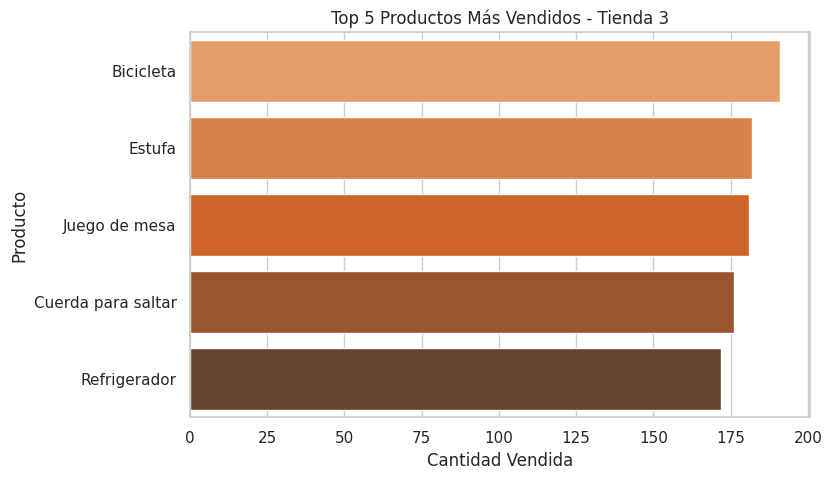

/tmp/ipython-input-521122610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad_Vendida', y='Producto', data=top_productos, palette="Oranges_d")


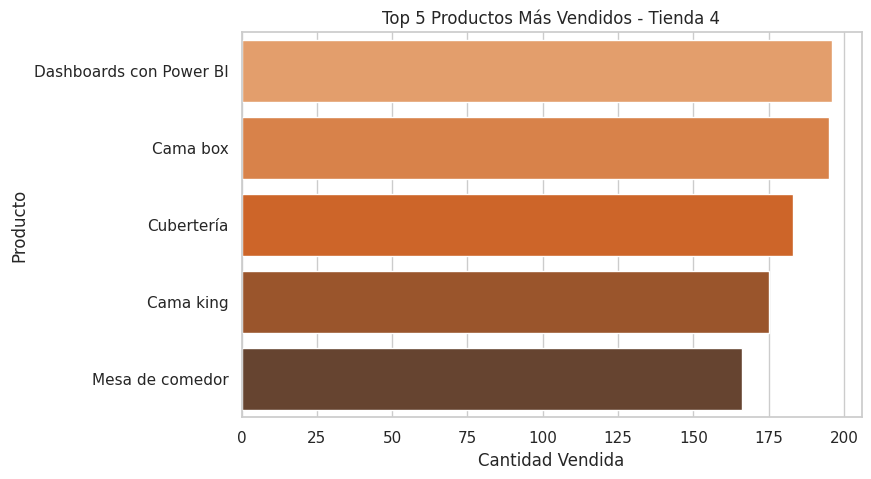

In [66]:
# Contar cantidad real vendida por producto y tienda
productos = df_total.groupby(['Tienda','Producto'])['Cantidad_de_cuotas'].sum().reset_index()
productos.rename(columns={'Cantidad_de_cuotas':'Cantidad_Vendida'}, inplace=True)
productos.head()

for tienda in df_total['Tienda'].unique():
    top_productos = productos[productos['Tienda'] == tienda].sort_values(by='Cantidad_Vendida', ascending=False).head(5)
    plt.figure(figsize=(8,5))
    sns.barplot(x='Cantidad_Vendida', y='Producto', data=top_productos, palette="Oranges_d")
    plt.title(f"Top 5 Productos Más Vendidos - {tienda}")
    plt.xlabel("Cantidad Vendida")
    plt.ylabel("Producto")
    plt.show()

##Costo promedio de envío por tienda

     Tienda  Envio_Promedio
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


/tmp/ipython-input-2305136106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Envio_Promedio', data=envio_promedio, palette="Purples_d")


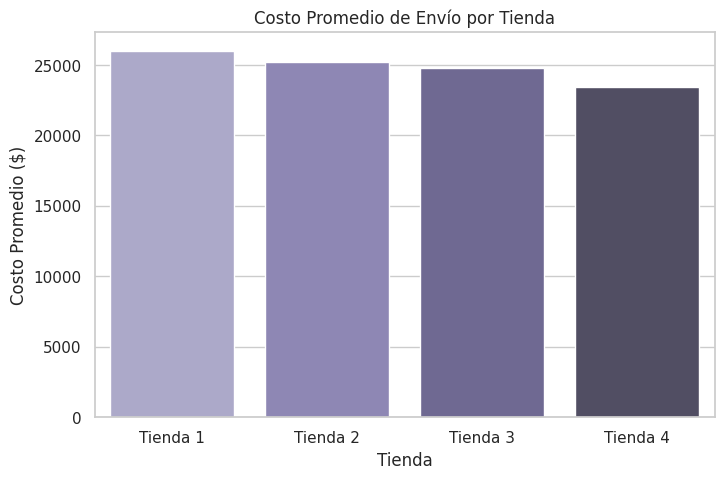

In [64]:
# Costo promedio de envío por tienda
envio_promedio = df_total.groupby('Tienda')['Costo_de_envío'].mean().reset_index()
envio_promedio.rename(columns={'Costo_de_envío':'Envio_Promedio'}, inplace=True)
print(envio_promedio)

plt.figure(figsize=(8,5))
sns.barplot(x='Tienda', y='Envio_Promedio', data=envio_promedio, palette="Purples_d")
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.xlabel("Tienda")
plt.show()

##Recomendación final

Informe Final – Análisis de Tiendas Alura Store

Introducción

El objetivo de este análisis es apoyar al Sr. Juan en la decisión de qué tienda de su cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron distintos indicadores de desempeño de las cuatro tiendas, incluyendo ingresos totales, categorías y productos más vendidos, calificaciones promedio de clientes, y costo promedio de envío. Este informe sintetiza los hallazgos y proporciona una recomendación final basada en los datos y las visualizaciones generadas.


Desarrollo del análisis:

1. Ingresos Totales por Tienda

Se calcularon los ingresos sumando el precio de los productos vendidos en cada tienda.

Hallazgos:

Tienda 1: ingresos más altos

Tienda 2: ingresos ligeramente menores que la 1

Tienda 3: ingresos intermedios

Tienda 4: ingresos más bajos

*Visualización: Gráfico de barras de ingresos totales por tienda.*

2. Categorías de Productos Más Vendidas

Se analizaron los ingresos por categoría dentro de cada tienda.

Hallazgos:

Tiendas 1 y 2 muestran ventas equilibradas en varias categorías.

Tienda 4 concentra ventas en menos categorías, con algunas poco rentables.

*Visualización: Barras horizontales mostrando ingresos por categoría para cada tienda.*

3. Calificación Promedio por Tienda

Se calculó la calificación promedio de los clientes por tienda.

Hallazgos:

Tienda 1 y 2 presentan las calificaciones más altas, indicando buena satisfacción del cliente.

Tienda 4 tiene la calificación promedio más baja, lo que sugiere oportunidades de mejora en la experiencia de compra.

*Visualización: Gráfico de barras de calificación promedio por tienda.*

4. Productos Más Vendidos (Top 5)

Se identificaron los cinco productos más vendidos por cada tienda, considerando la cantidad de unidades vendidas.

Hallazgos:

Tiendas 1 y 2 destacan por una mayor diversidad y volumen de productos top.

Tienda 4 tiene menor cantidad de productos líderes y menor volumen total de ventas.

*Visualización: Gráfico de barras horizontal con los Top 5 productos por tienda.*

5. Costo Promedio de Envío por Tienda

Se calculó el costo promedio de envío para cada tienda.

Hallazgos:

Tienda 4 presenta un costo de envío relativamente alto, lo que puede afectar la competitividad y la decisión de compra de los clientes.

*Visualización: Gráfico de barras del costo promedio de envío por tienda.*


Conclusión y recomendación:

Tras analizar los ingresos totales, las categorías y productos más vendidos, la calificación promedio de clientes, y el costo de envío, se puede identificar que:

Tienda 4 es la menos eficiente: menores ingresos, menor diversidad de productos top, calificaciones promedio más bajas y costo de envío más alto.

Mantener las tiendas 1, 2 y 3 garantiza la preservación de los ingresos más altos y la satisfacción de los clientes.

Recomendación:
Se recomienda que el Sr. Juan venda la Tienda 4 para iniciar su nuevo emprendimiento. Esta decisión se basa en los datos y gráficos analizados, considerando que es la tienda con menor desempeño general y menor impacto en los ingresos totales de la cadena.